<a href="https://colab.research.google.com/github/jin-raii/Handwritten-digits-using-Deep-Learning/blob/main/cnn_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import numpy as np
import matplotlib.pyplot as plt

###**1.** Load Mnist Dataset

1.   List item
2.   List item




*   X_train has (60000, 28, 28)
      1. 60000 -> images
      2. 28 * 28 -> image pixel
*   y_train contains (60000) -> labels of images [0-9]
  

*   X_test contains ( 10000, 28, 28 ) -> images **to evaluate the MODEL performance**
      1. 10000 -> images
      2. 28 * 28 -> image pixel
*   y_test contains ( 60000 ) -> labels of images [0-9] **TRUE labels for the specific images**





In [23]:

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()


In [24]:
print(f'training : {X_train.shape}, labels : {y_train.shape}')
print(f'testning : {X_test.shape}, labels : {y_test.shape}')

training : (60000, 28, 28), labels : (60000,)
testning : (10000, 28, 28), labels : (10000,)


### **2.** Visualize first image from mnist dataset

Text(0.5, 1.0, '5')

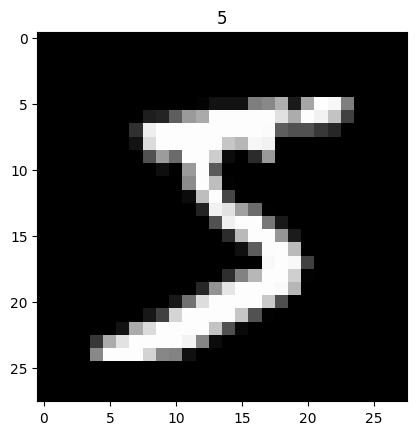

In [31]:
plt.imshow(X_train[0], cmap='grey')
plt.title(y_train[0])


### **3.** Build CNN
1. Conv2D(30, (3,3), 'relu', (28, 28,1))
    1. 30 -> number of filters to detect patterns
    2. (3,3) -> each filter scans 3 * 3 pixels at a time
    3. 'relu' -> introduces non-linearity to Conv2D array
    4. (28, 28, 1) -> image pixels with 1 colorchannel in our case black & grey
2. MaxpoolLayer(2,2)
    * Reduces the image size to speed up training process
3. Conv2D(60, (3,3), 'relu')
    * another Convolutional Layer for deeper feature extraction
4. MaxPoolLayer(2,2)
    * again, reduce image size to improve efficency
5. Flatten Layer
    1. Flatten()
      * Converts 2D feature maps into 1D vector for the next layers
6. Fully Connected Layers
    1. Dense(128, 'relu')
      * 128 -> number of Neurons to learn complex pattern from flattend images
      * 'relu' -> non-linearity
    2. Dense(10, 'softmax')
      * 10 -> number of outputs. in our case [0-9] labels
      * 'softmax' -> used for multi-class classification ( returns probability distribution [0, -1])

In [33]:
model = models.Sequential([
    layers.Conv2D(30, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPool2D(2,2),
    layers.Conv2D(60, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 30)          │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 60)          │          16,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 60)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         192,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,978 (820.23 KB)

 Trainable params: 209,978 (820.23 KB)

 Non-trainable params: 0 (0.00 B)

### **4.** Compile and Train the MODEL
1. Optimizer = 'adam' ->  **Adjusts weights efficiently**
2. loss = 'sparse_categorical_crossentropy' -> **Suitable for Multi-Class Classification**
3. metrics='accuracy' -> **gives accuracy of model during training**

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9774 - loss: 0.0815 - val_accuracy: 0.9829 - val_loss: 0.0538
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9837 - loss: 0.0578 - val_accuracy: 0.9890 - val_loss: 0.0344
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9909 - loss: 0.0284 - val_accuracy: 0.9849 - val_loss: 0.0577
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9901 - loss: 0.0420 - val_accuracy: 0.9948 - val_loss: 0.0170
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.9914 - loss: 0.0296 - val_accuracy: 0.9926 - val_loss: 0.0245


### **5.** Evaluate The Trained Model

In [37]:
train_loss, test_loss = model.evaluate(X_test, y_test)
print(f'Train Loss : {train_loss}')
print(f'Test Loss : {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9904 - loss: 0.0300
Train Loss : 0.024462388828396797
Test Loss : 0.9926000237464905


### **6.** Save Model

In [38]:
model.save('my_model.h5')

### **7.** Try Loading Saved Model

In [40]:
my_model = models.load_model('my_model.h5')

In [44]:
X_test.shape

(10000, 28, 28)

### **8.** Predict using my_model

In [46]:
my_model_pred = my_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [47]:
my_model_pred[0]

array([2.9285460e-20, 1.9029272e-17, 9.4367623e-16, 4.1236092e-15,
       3.4054489e-21, 1.1231447e-19, 3.3345250e-30, 9.9999994e-01,
       4.3406435e-20, 3.6225133e-12], dtype=float32)

In [70]:
print(f'True Labels : {y_test[5]} \nPredicted label : {np.argmax(my_model_pred[5])}')

True Labels : 1 
Predicted label : 1


In [69]:
my_model_pred.shape

(10000, 10)

In [62]:
pred_val = [np.argmax(i) for i in my_model_pred]

In [63]:
pred_val[0]

np.int64(7)